La variable la plus importante et la variable "TARGET" et on a pu voir depuis le début que nous avons un jeu de donnée déséquilibré. Pour faire la prédiction, nous allons standardiser nos valeurs et les normaliser. Puis effectuer la méthode SMOTE pour la classification et une validation croisée stratifiée répétée k-fold pour évaluer le modèle.
Nous évaluerons le modèle à l'aide de la métrique ROC.

In [2]:
#Importation des librairies de bases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importation des librairies de sklearn
from sklearn import datasets, preprocessing, model_selection, ensemble, pipeline

import warnings
warnings.filterwarnings("ignore")

In [3]:
app_train = pd.read_csv("/content/drive/MyDrive/projet7/data/app_train.csv")
app_test = pd.read_csv("/content/drive/MyDrive/projet7/data/app_test.csv")

0    91.93
1     8.07
Name: TARGET, dtype: float64


Text(0.5, 1.0, 'Répartion de la valeur TARGET')

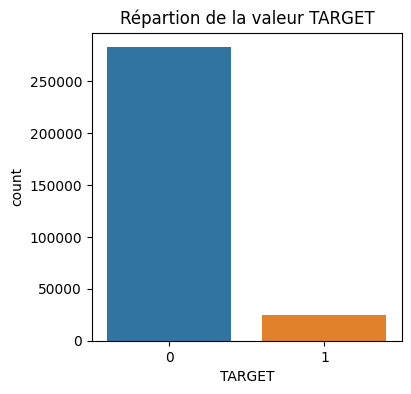

In [4]:
print(round(app_train.TARGET.value_counts(normalize = True),4)*100)
plt.rcParams["figure.figsize"] = (4, 4)
sns.countplot(data = app_train, x = "TARGET")
plt.title("Répartion de la valeur TARGET")

Le SMOTE, acronyme pour Synthetic Minority Oversampling TEchnique, est une méthode de suréchantillonnage des observations minoritaires. Le SMOTE se base sur un principe simple : générer de nouveaux individus minoritaires qui ressemblent aux autres, sans être strictement identiques. Cela permet de densifier de façon plus homogène la population d’individus minoritaires.
Les règles de SMOTE :

*   Optimiser les paramètres du SMOTE
*   Normaliser les variables numériques avant le SMOTE
*   Retraiter les variables discrètes après le SMOTE
*   Ne jamais encoder les variables catégorielles en numériques
*   Ne jamais utiliser SMOTE sur les données validation/test


Le SMOTE est une technique très utile pour rééquilibrer les données numériques en entrée d’un modèle de Machine Learning. Il permet d’éviter le surapprentissage du modèle en densifiant les individus minoritaires de façon homogène et peut améliorer significativement les performances de vos modèles.
Pour utiliser le SMOTE sans danger, il est indispensable de se souvenir des cinq règles suivantes :


*   Les paramètres optimaux du SMOTE dépendent de vos données et doivent donc être optimisés. Le plus simple est de les optimiser en même temps que votre modèle.
*   Les variables numériques doivent être normalisées.
*   Les variables discrètes doivent être retraitées entre le SMOTE et le modèle.
*   Les variables catégorielles doivent être conservées telles quelles et ne pas être encodées.
*  Le SMOTE est réservé à l’entraînement du modèle et ne doit surtout pas être appliqué aux données de validation et de test.

Création des observations synthétiques Pour créer un individu synthétique, les étapes définies dans l’algorithme du SMOTE sont les suivantes :

*   Sélectionner aléatoirement une observation minoritaire “initiale”.
*   Identifier ses k plus proches voisins parmi les observations minoritaires
    (où k est un paramètre défini par l’utilisateur).
*   Choisir aléatoirement l’un des k plus proches voisins.
*   Générer aléatoirement un coefficient 0 < a < 1
*   Créer un nouvel individu entre l’observation initiale et le plus proche voisin choisi, selon la valeur du coefficient . Par exemple, si a = 0.5, le nouvel individu sera positionné à mi-chemin entre l’observation initiale et le plus proche voisin choisi.


# Standardisation

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

col = app_test.select_dtypes(include = 'object').columns
cat_train = app_train.select_dtypes(include = 'object')
cat_test = app_test.select_dtypes(include = 'object')

cat_train = cat_train.apply(lambda col: le.fit_transform(col))
cat_test = cat_test.apply(lambda col: le.fit_transform(col))

cat_train.head(3)

NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0                   0            1             0                1   
1                   0            0             0                0   
2                   1            1             1                1   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                6                 7                    4                   3   
1                1                 4                    1                   1   
2                6                 7                    4                   3   

   NAME_HOUSING_TYPE  OCCUPATION_TYPE  WEEKDAY_APPR_PROCESS_START  \
0                  1                8                           6   
1                  1                3                           1   
2                  1                8                           1   

   ORGANIZATION_TYPE  FONDKAPREMONT_MODE  HOUSETYPE_MODE  WALLSMATERIAL_MODE  \
0                  5                   2               0                   5   
1                 39                   2               0                   0   
2                 11                   0               0                   3   

   EMERGENCYSTATE_MODE  
0                    0  
1                    0  
2                    0

In [6]:
tab_train = app_train.copy()
tab_train[col] = cat_train
tab_train.head(3)

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0      100002       1                   0            1             0   
1      100003       0                   0            0             0   
2      100004       0                   1            1             1   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                1             0          202500.0    406597.5      24700.5   
1                0             0          270000.0   1293502.5      35698.5   
2                1             0           67500.0    135000.0       6750.0   

   ...  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0  ...                 0                 0                 0   
1  ...                 0                 0                 0   
2  ...                 0                 0                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                        0.0                         1.0   
1                        0.0                         0.0   
2                        0.0                         0.0   

   DAYS_EMPLOYED_OUTLIERS  
0                   False  
1                   False  
2                   False  

[3 rows x 123 columns]

In [7]:
tab_test = app_test.copy()
tab_test[col] = cat_test
tab_test.head(3)

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100001                   0            0             0                1   
1      100005                   0            1             0                1   
2      100013                   0            1             1                1   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          135000.0    568800.0      20560.5         450000.0   
1             0           99000.0    222768.0      17370.0         180000.0   
2             0          202500.0    663264.0      69777.0         630000.0   

   ...  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
0  ...                 0                 0                 0   
1  ...                 0                 0                 0   
2  ...                 0                 0                 0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
0                        0.0                         0.0   
1                        0.0                         3.0   
2                        1.0                         4.0   

   DAYS_EMPLOYED_OUTLIERS  
0                   False  
1                   False  
2                   False  

[3 rows x 122 columns]

# SMOTE

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification, load_breast_cancer
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler


X_train = tab_train.loc[ : , tab_train.columns != 'TARGET']
y_train = tab_train['TARGET'].values
X_test = tab_test

scaler = preprocessing.StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
data_train = pd.DataFrame(X_train_scaled)
data_train.columns = tab_test.columns
data_y_train = pd.DataFrame(y_train)
data_y_train.columns = ["TARGET"]

X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = tab_test.columns

Les données sont normalisée, on peut utiliser le SMOTE.

In [10]:
X = data_train.copy()
y = data_y_train.copy()

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)


pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', LogisticRegression(random_state=11,
                                                                  max_iter=1000)]])

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

param_grid = {'classifier__C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print('Cross-validation score : %.3f' % cv_score)
print('Test score : %.3f' % test_score)
print('Meilleure paramètre : ', grid_search.best_params_)

Cross-validation score : 0.739
Test score : 0.734
Meilleure paramètre :  {'classifier__C': 1}


In [11]:
X = data_train.copy()
y = data_y_train.copy()

X_train_smote, X_test, y_train_smote, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)


pipeline = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['scaler', MinMaxScaler()],
                                ['classifier', LogisticRegression(random_state=11,
                                                                  max_iter=1000)]])

stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

param_grid = {'classifier__C':[1]}
grid_search = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print('Cross-validation score : %.3f' % cv_score)
print('Test score : %.3f' % test_score)

Cross-validation score : 0.739
Test score : 0.734


In [12]:
X_train_smote.shape, X_test.shape, y_train_smote.shape, y_test.shape

((246008, 122), (61503, 122), (246008, 1), (61503, 1))

# DummyClassifier

In [13]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
# create DummyClassifier model and generate predictions
dummy_clf = DummyClassifier(strategy='most_frequent', random_state=0)
dummy_clf.fit(X_train_smote, y_train_smote)
y_pred = dummy_clf.predict(X_test)

In [14]:
def matrice_confusion(X_test, y_test, y_pred, model):
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    print('AUC : %0.4f' %roc_auc)
    print(classification_report(y_test, y_pred))

    y_pred = pd.DataFrame(y_pred)
    y_pred.columns = ["TARGET"]

    confusion_matrix = confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

    cm_display.plot()
    plt.show()

def score_cout(TN, FP, FN, TP):
    resultat = ((TP + TN) / (TP + TN + 10*FN + FP))
    return resultat

AUC : 0.5000
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.00      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.46      0.50      0.48     61503
weighted avg       0.85      0.92      0.88     61503



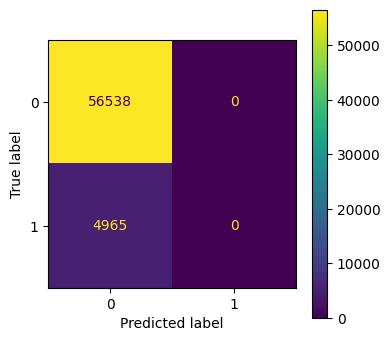

In [15]:
matrice_confusion(X_test,y_test, y_pred, dummy_clf)

In [16]:
TN = 56538
FP = 0
FN = 4965
TP = 0

resultat_dummy_clf = score_cout(TN, FP, FN, TP)
print("Le coût du modèle DummyClassifier est : %0.4f" %resultat_dummy_clf)

Le coût du modèle DummyClassifier est : 0.5324


# RandomForest

In [17]:
from sklearn.ensemble import RandomForestClassifier
# create random forest model and generate predictions
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_smote, y_train_smote)
y_pred_smote = rfc.predict(X_test)

AUC : 0.7083
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.41      0.00      0.00      4965

    accuracy                           0.92     61503
   macro avg       0.67      0.50      0.48     61503
weighted avg       0.88      0.92      0.88     61503



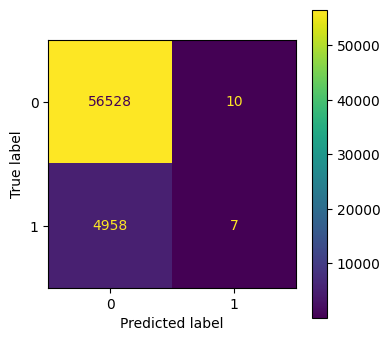

In [18]:
matrice_confusion(X_test, y_test, y_pred_smote, rfc)

In [19]:
TN = 56528
FP = 10
FN = 4958
TP = 7

resultat_rfc = score_cout(TN, FP, FN, TP)
print("Le coût du modèle RandomForestClassifier est : %0.4f" %resultat_rfc)

Le coût du modèle RandomForestClassifier est : 0.5327


# LGBMClassifier

In [20]:
from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import auc, roc_curve, roc_auc_score
from collections import Counter
from sklearn.model_selection import cross_val_score

kfold = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)

def cross_validation(x, y, model):
    result= cross_val_score(model, x, y, cv=kfold, scoring="roc_auc", n_jobs=-1)
    print("Score: %f" % result.mean())

lgb = LGBMClassifier()

scores = cross_validation(X_train_smote, y_train_smote, lgb)
lgb.fit(X_train_smote, y_train_smote)
y_pred_LGB = lgb.predict(X_test)
print(scores)

Score: 0.754699
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.147029 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11426
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
None


AUC : 0.7530
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.56      0.02      0.03      4965

    accuracy                           0.92     61503
   macro avg       0.74      0.51      0.50     61503
weighted avg       0.89      0.92      0.88     61503



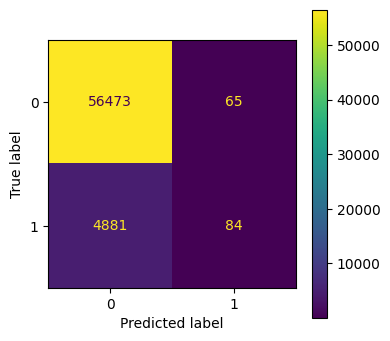

In [21]:
matrice_confusion(X_test, y_test, y_pred_LGB, lgb)

In [22]:
TN = 56473
FP = 65
FN = 4881
TP = 84
resultat_lgb = score_cout(TN, FP, FN, TP)
print("Le coût du modèle LGBMClassifier est : %0.4f" %resultat_lgb)

Le coût du modèle LGBMClassifier est : 0.5364


# XGBClassifier

In [23]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()

scores_xgbc = cross_validation(X_train_smote, y_train_smote, xgbc)
xgbc.fit(X_train_smote, y_train_smote)
y_pred = xgbc.predict(X_test)
print(scores_xgbc)

Score: 0.744691
None


AUC : 0.7443
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.46      0.03      0.06      4965

    accuracy                           0.92     61503
   macro avg       0.69      0.51      0.51     61503
weighted avg       0.88      0.92      0.89     61503



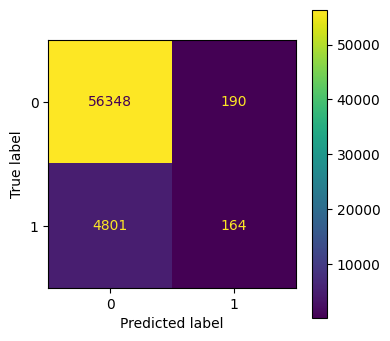

In [24]:
matrice_confusion(X_test, y_test, y_pred, xgbc)

In [30]:
TN = 56348
FP = 190
FN = 4801
TP = 164

resultat_xgbc = score_cout(TN, FP, FN, TP)
print("Le coût du modèle XGBClassifier est : %0.4f" %resultat_xgbc)

Le coût du modèle XGBClassifier est : 0.5397


# AdaBoostClassifier

In [26]:
ada = AdaBoostClassifier(learning_rate=0.2,
                         algorithm = 'SAMME.R',
                         n_estimators=200,
                         random_state=100)
scores_ada = cross_validation(X_train_smote, y_train_smote, ada)
ada.fit(X_train_smote, y_train_smote)
y_pred = ada.predict(X_test)
print(scores_ada)

Score: 0.749431
None


AUC : 0.7468
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.51      0.01      0.02      4965

    accuracy                           0.92     61503
   macro avg       0.71      0.50      0.49     61503
weighted avg       0.89      0.92      0.88     61503



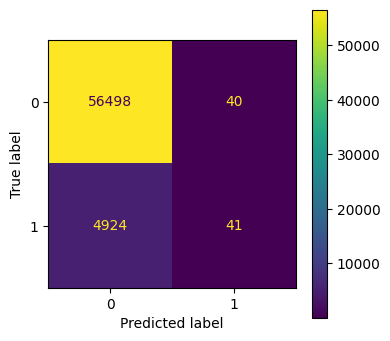

In [27]:
matrice_confusion(X_test, y_test, y_pred, ada)

In [29]:
TN = 56498
FP = 40
FN = 4924
TP = 41

resultat_ada = score_cout(TN, FP, FN, TP)
print("Le coût du modèle AdaBoostClassifier est : %0.4f" %resultat_ada)

Le coût du modèle AdaBoostClassifier est : 0.5343


Les meilleures résultats sont les derniers, mais on peut voir que le modèle le plus intéressant est LGBMClassifier

# ROC

In [31]:
classifiers = [dummy_clf, rfc, lgb, xgbc, ada]

result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

for cls in classifiers:
    model = cls.fit(X_train_smote, y_train_smote)
    yproba = model.predict_proba(X_test)[::,1]

    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.146061 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11426
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482


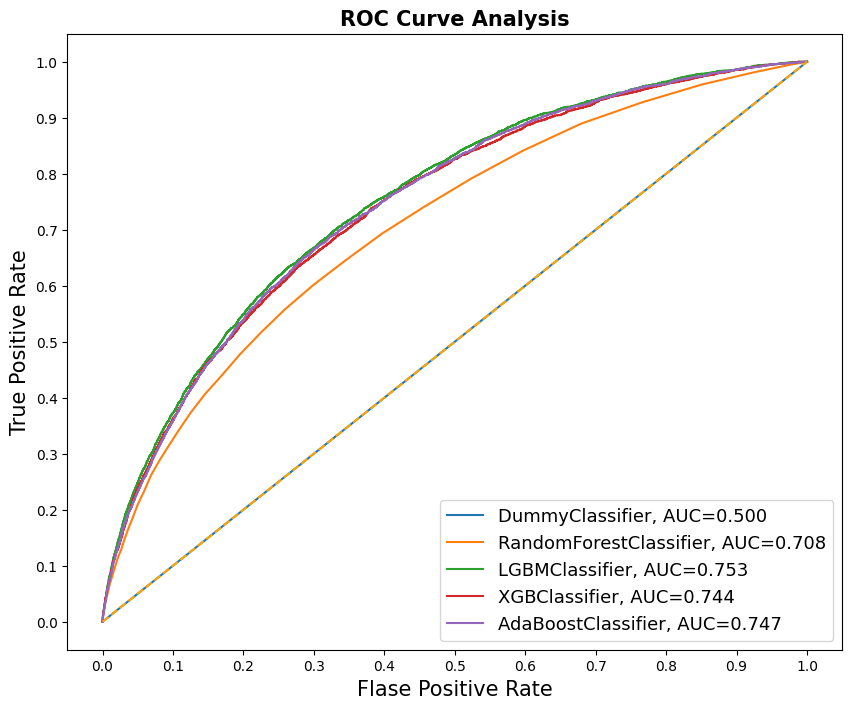

In [32]:
fig = plt.figure(figsize=(10,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc'])
             )

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [33]:
def train_models(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    AUC = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    Accuracy = accuracy_score(y_test, model.predict(X_test))
    Precision = precision_score(y_test, model.predict(X_test))
    Recall = recall_score(y_test, model.predict(X_test))
    F1 = f1_score(y_test, model.predict(X_test))

    score = [AUC, Accuracy, Precision, Recall, F1]

    return score

In [34]:
results = []
for model in classifiers:
    results.append(train_models(model, X_train_smote, X_test, y_train_smote, y_test))

Model = ["DummyClassifier", "RandomForestClassifier", "LGBMClassifier", "XGBClassifier", "AdaBoostClassifier"]
Model = pd.DataFrame(Model)
Model.columns = ["Model"]

results = pd.DataFrame(results)
results.columns = ["AUC", "Accuracy", "Precision", "Recall", "F1"]

[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.142830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11426
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482


On va fusionner les tableaux des erreurs et des précisions de chaque modèle.

In [35]:
cout = [resultat_dummy_clf, resultat_rfc, resultat_lgb, resultat_xgbc, resultat_ada]
Cout = pd.DataFrame(cout)
Cout.columns = ["Cout"]
Cout = Model.join(Cout, how = 'outer')

score = Model.join(results, how = 'outer')
score = pd.merge(score, Cout, on = "Model", how = 'outer')
score.sort_values('AUC', ascending=False, inplace=True)
score

Model       AUC  Accuracy  Precision    Recall        F1  \
2          LGBMClassifier  0.752987  0.919581   0.563758  0.016918  0.032851   
4      AdaBoostClassifier  0.746830  0.919288   0.506173  0.008258  0.016250   
3           XGBClassifier  0.744304  0.918849   0.463277  0.033031  0.061666   
1  RandomForestClassifier  0.708336  0.919223   0.411765  0.001410  0.002810   
0         DummyClassifier  0.500000  0.919272   0.000000  0.000000  0.000000   

       Cout  
2  0.536431  
4  0.534299  
3  0.539690  
1  0.532721  
0  0.532433

# Class weight

(246008, 122) (246008, 1)
[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.145238 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11407
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 117
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Accuracy score on balanced weights: 70.3%
F1 score on balanced weights: 0.267
AUC : 0.7575
              precision    recall  f1-score   support

           0       0.92      0.68      0.78     56554
           1       0.08      0.32      0.13      4949

    accuracy                           0.65     61503
   macro avg       0.50      0.50      0.46     61503
weighted avg       0.85      0.65      0.73     615

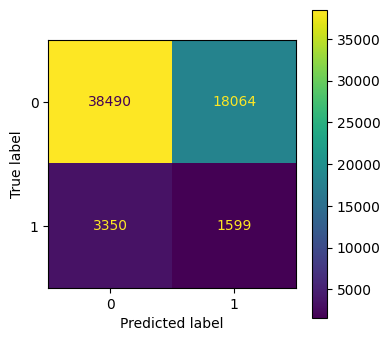

In [36]:
X = data_train.copy()
y = data_y_train.copy()

X_train_weight, X_test_weight, y_train_weight, y_test_weight = train_test_split(X,
                                 y,test_size=0.2,random_state=42)
print(X_train_weight.shape,y_train_weight.shape)

lgbm_classifier = LGBMClassifier(class_weight='balanced')
lgbm_classifier.fit(X_train_weight, y_train_weight)
print(f'Accuracy score on balanced weights: {lgbm_classifier.score(X_test_weight, y_test_weight)*100:.1f}%')
print(f'F1 score on balanced weights: {f1_score(y_test_weight,lgbm_classifier.predict(X_test_weight)):.3f}')
y_pred_weight = lgbm_classifier.predict(X_test)
matrice_confusion(X_test_weight, y_test_weight, y_pred_weight, lgbm_classifier)

In [37]:
TN = 38490
FP = 18064
FN = 3350
TP = 1599

resultat_lgb_weight = score_cout(TN, FP, FN, TP)
print("Le cout du modèle de LGBMClassifier avec la méthode de Class Weight est %0.4f" %resultat_lgb_weight)

Le cout du modèle de LGBMClassifier avec la méthode de Class Weight est 0.4374


[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.148997 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11407
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 117
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


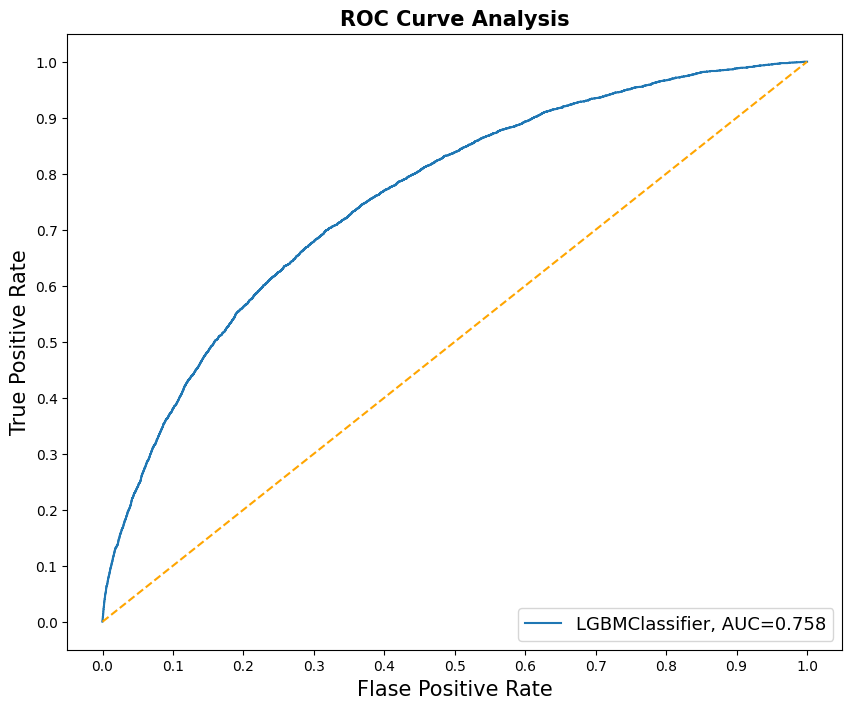

In [38]:
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

classifiers = [lgbm_classifier]

for cls in classifiers:
    model = cls.fit(X_train_weight, y_train_weight)
    yproba = model.predict_proba(X_test_weight)[::,1]

    fpr, tpr, _ = roc_curve(y_test_weight, yproba)
    auc = roc_auc_score(y_test_weight, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(10,8))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc'])
             )

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

In [39]:
results_weight = []
classifiers = [lgbm_classifier]
for model in classifiers:
    results_weight.append(train_models(model, X_train_weight, X_test_weight, y_train_weight, y_test_weight))

Model = ["LGBMClassifier_Class_Weight"]
Model = pd.DataFrame(Model)
Model.columns = ["Model"]

results_weight = pd.DataFrame(results_weight)
results_weight.columns = ["AUC", "Accuracy", "Precision", "Recall", "F1"]

[LightGBM] [Info] Number of positive: 19876, number of negative: 226132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.137478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11407
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 117
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000


In [40]:
cout = [resultat_lgb_weight]
Cout = pd.DataFrame(cout)
Cout.columns = ["Cout"]
Cout = Model.join(Cout, how = 'outer')

score_weight = Model.join(results_weight, how = 'outer')
score_weight = pd.merge(score_weight, Cout, on = "Model", how = 'outer')
score = score.append(score_weight)
score.sort_values('AUC', ascending=False, inplace=True)
score

Model       AUC  Accuracy  Precision    Recall  \
0  LGBMClassifier_Class_Weight  0.757537  0.702974   0.166842  0.673874   
2               LGBMClassifier  0.752987  0.919581   0.563758  0.016918   
4           AdaBoostClassifier  0.746830  0.919288   0.506173  0.008258   
3                XGBClassifier  0.744304  0.918849   0.463277  0.033031   
1       RandomForestClassifier  0.708336  0.919223   0.411765  0.001410   
0              DummyClassifier  0.500000  0.919272   0.000000  0.000000   

         F1      Cout  
0  0.267463  0.437400  
2  0.032851  0.536431  
4  0.016250  0.534299  
3  0.061666  0.539690  
1  0.002810  0.532721  
0  0.000000  0.532433

# Sélection du modèle

On choisit le modèle LGBMClassifier, on va modifier les paramètres pour prendre les meilleures.

In [41]:
lgb = LGBMClassifier()

scores = cross_validation(X_train_smote, y_train_smote, lgb)
lgb.fit(X_train_smote, y_train_smote)

score = model.score(X_test, y_test)
print("Le score est : %0.4f" %score)

y_pred_scaled = lgb.predict(X_test_scaled)

Score: 0.754699
[LightGBM] [Info] Number of positive: 19860, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.147226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11426
[LightGBM] [Info] Number of data points in the train set: 246008, number of used features: 118
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080729 -> initscore=-2.432482
[LightGBM] [Info] Start training from score -2.432482
Le score est : 0.7128


In [42]:
print("LGBMClassifier :")
note_0 = ((y_pred_scaled == 0).sum()*100/y_pred_scaled.shape[0])
print('- TARGET[0] : %.3f' % note_0, '%')
nb_0 = (y_pred_scaled == 0).sum()
print('- TARGET[0] :', nb_0)
note_1 = ((y_pred_scaled == 1).sum()*100/y_pred_scaled.shape[0])
print('- TARGET[1] : %.3f' % note_1, '%')
nb_1 = (y_pred_scaled == 1).sum()
print('- TARGET[1] :', nb_1)

LGBMClassifier :
- TARGET[0] : 99.877 %
- TARGET[0] : 48684
- TARGET[1] : 0.123 %
- TARGET[1] : 60


# Les features les plus importantes

## Les Features les plus importantes de manière globales

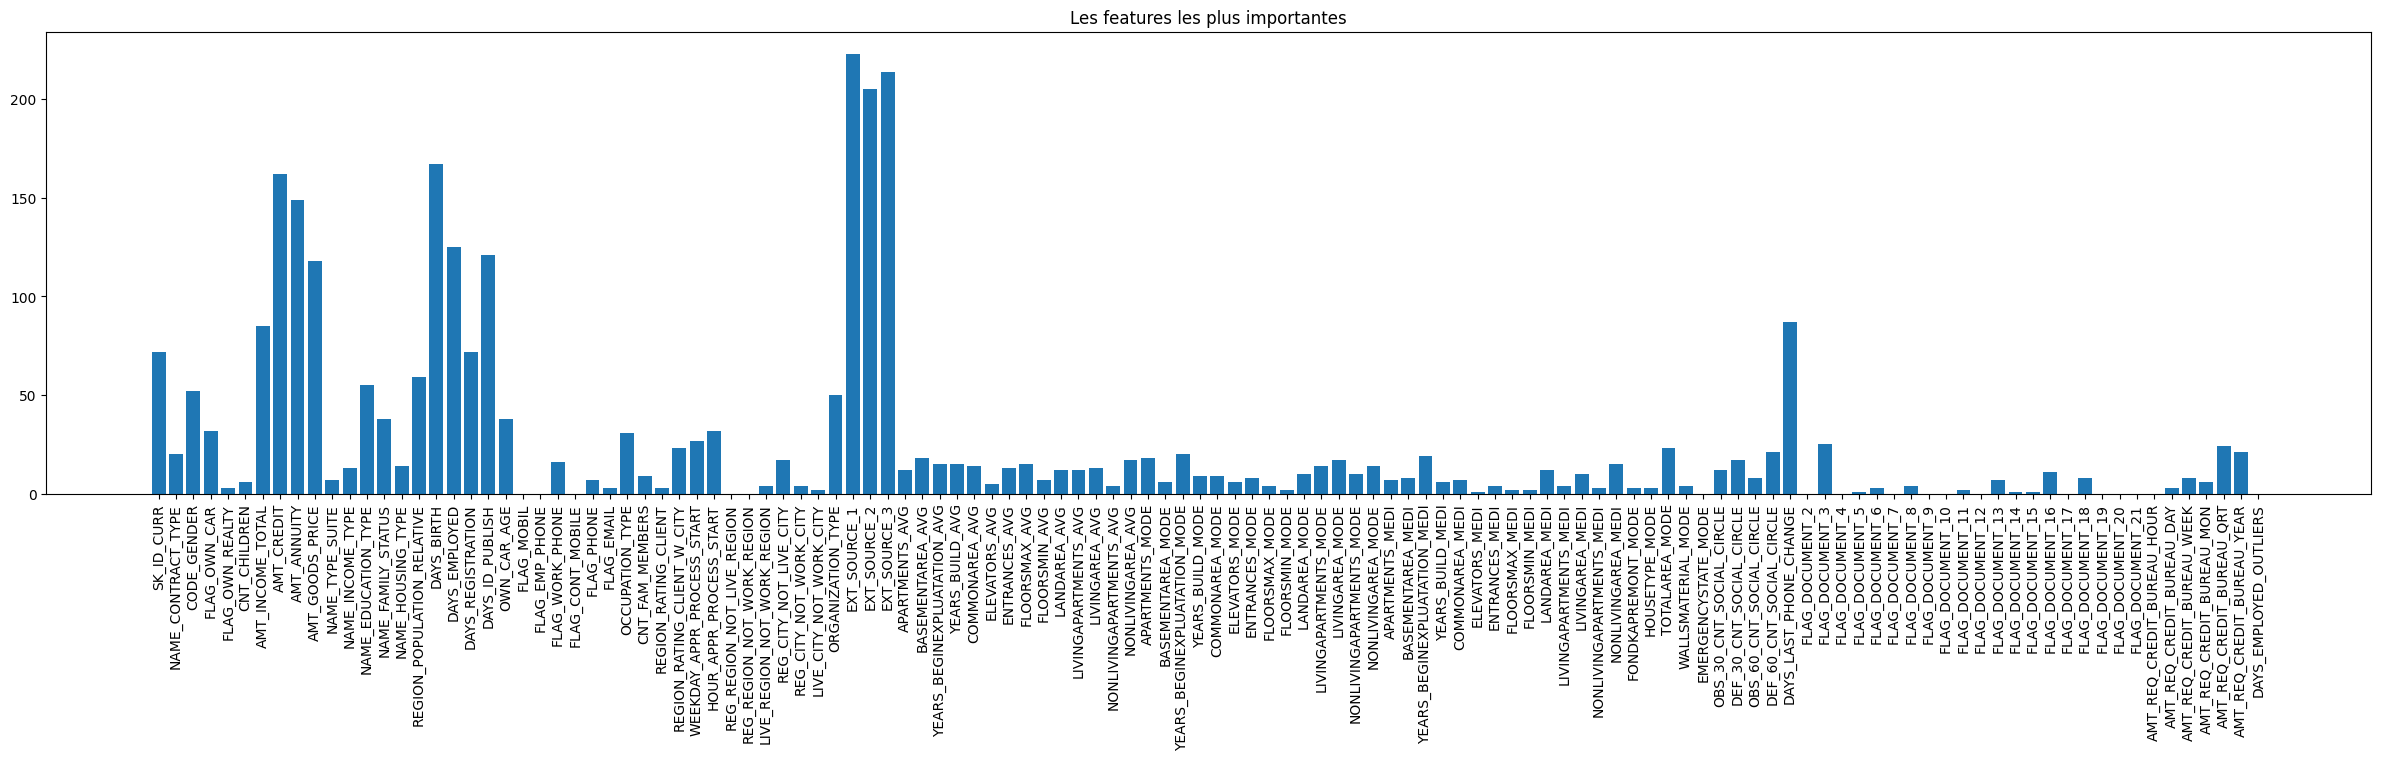

In [43]:
# LGBMClassifier for feature importance on a classification problem
from sklearn.datasets import make_classification
# get importance
importance = lgb.feature_importances_
# plot feature importance
plt.rcParams["figure.figsize"] = (30, 6)
plt.bar([x for x in range(len(importance))], importance, tick_label = X_train.columns)
plt.xticks(rotation=90)
plt.title("Les features les plus importantes")
plt.show()

In [44]:
# summarize feature importance
col = X_train.columns
col_imp = []
for i,v in enumerate(importance):
	if v >= 100 :
		print('Colonne : %s, Score : %.5f' % (col[i],v))

Colonne : AMT_CREDIT, Score : 162.00000
Colonne : AMT_ANNUITY, Score : 149.00000
Colonne : AMT_GOODS_PRICE, Score : 118.00000
Colonne : DAYS_BIRTH, Score : 167.00000
Colonne : DAYS_EMPLOYED, Score : 125.00000
Colonne : DAYS_ID_PUBLISH, Score : 121.00000
Colonne : EXT_SOURCE_1, Score : 223.00000
Colonne : EXT_SOURCE_2, Score : 205.00000
Colonne : EXT_SOURCE_3, Score : 214.00000


In [45]:
importance = importance[importance >= 100]
col_imp = ["AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
           "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_ID_PUBLISH",
           "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]
tab = pd.DataFrame(importance)
tab = tab.transpose()
tab.rename(columns=lambda x, y=iter(col_imp): next(y), inplace = True)

Text(0.5, 1.0, 'Les features les plus importantes')

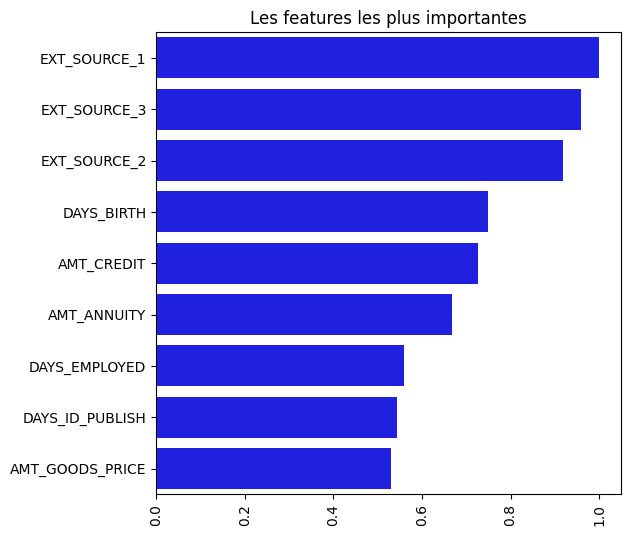

In [46]:
tab = tab.transpose().sort_values(by=0, ascending = False)

for column in tab.columns:
    tab[column] = tab[column]  / tab[column].abs().max()

plt.rcParams["figure.figsize"] = (6, 6)
sns.barplot(data=tab.transpose(), color = 'blue', orient='h')
plt.xticks(rotation=90)
plt.title("Les features les plus importantes")

## Les Features les plus importantes de manières locales

In [50]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=22ff68c3848a9d7ef648fc2d7b77d83c6656cef7bab2943c738c5af9ff78863c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [51]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
        training_data=np.array(X_train_smote),
        feature_names=X_train_smote.columns,
        class_names=['Positif', 'Negatif'],
        mode='classification'
)

In [54]:
plt.rcParams["figure.figsize"] = (30, 30)

exp = explainer.explain_instance(
    data_row = X_test_scaled.iloc[212],
    predict_fn = lgb.predict_proba
)

exp.show_in_notebook(show_table=True)

Les features importantes qui fait que ce client n'est pas à risque et peut rembourser son prêts.

In [55]:
exp.as_list()

[('FLAG_DOCUMENT_21 <= -0.02', -0.08630628564156534),
 ('EXT_SOURCE_2 <= -0.64', 0.04190203678618537),
 ('FLAG_DOCUMENT_15 <= -0.03', -0.021440022173609734),
 ('FLAG_DOCUMENT_4 <= -0.01', -0.018976858314732566),
 ('EXT_SOURCE_1 > 0.01', -0.01826234300919406),
 ('AMT_GOODS_PRICE > 0.38', -0.018105674043743147),
 ('FLAG_DOCUMENT_14 <= -0.05', 0.017254776912612613),
 ('AMT_REQ_CREDIT_BUREAU_QRT <= -0.31', -0.01555534948194239),
 ('FLAG_DOCUMENT_19 <= -0.02', -0.01035695190428406),
 ('FLAG_DOCUMENT_7 <= -0.01', 0.008820243584971967)]

In [56]:
test = pd.DataFrame(y_pred_scaled)
test.columns = ["TARGET"]
test[test["TARGET"] == 1].T

2477   2764   2979   3089   3100   3640   5604   6747   7311   7670   \
TARGET      1      1      1      1      1      1      1      1      1      1   

        ...  41203  41324  41338  43607  44283  44795  44958  46343  46351  \
TARGET  ...      1      1      1      1      1      1      1      1      1   

        47988  
TARGET      1  

[1 rows x 60 columns]

In [57]:
plt.rcParams["figure.figsize"] = (30, 30)

exp = explainer.explain_instance(
    data_row = X_test_scaled.iloc[2764],
    predict_fn = lgb.predict_proba
)

exp.show_in_notebook(show_table=True)

Les features importantes qui fait que ce client est à risque et ne peut pas rembourser son prêts. Donc il peut voir qu'elles features fait défaut.

In [58]:
exp.as_list()

[('EXT_SOURCE_3 <= -0.57', 0.04712134880766953),
 ('EXT_SOURCE_2 <= -0.64', 0.045460415831997045),
 ('FLAG_DOCUMENT_19 <= -0.02', -0.033156687060053924),
 ('FLAG_DOCUMENT_9 <= -0.06', -0.01882755751212218),
 ('AMT_REQ_CREDIT_BUREAU_QRT <= -0.31', -0.01805222082182066),
 ('EXT_SOURCE_1 > 0.01', -0.01683661123227653),
 ('FLAG_DOCUMENT_7 <= -0.01', 0.014878989862838235),
 ('FLAG_DOCUMENT_2 <= -0.01', 0.013663198065522186),
 ('FLAG_DOCUMENT_15 <= -0.03', -0.012740169170688419),
 ('FLAG_DOCUMENT_20 <= -0.02', 0.006892030311687199)]